In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import Moffat2DKernel
from scipy.signal import convolve as scipy_convolve

In [7]:
#here I use an analytical profile as the PSF (called a Moffat)
#You will use instead a cutout of a star from the data
PSF = Moffat2DKernel(gamma=3, alpha=2, x_size=20, y_size=20, mode='oversample')

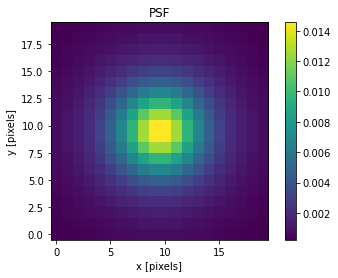

In [8]:
plt.imshow(PSF, interpolation='none', origin='lower')
plt.xlabel('x [pixels]')
plt.ylabel('y [pixels]')
plt.title('PSF')
plt.colorbar()
plt.show()

In [12]:
#Now we create a model of the *unconvolved* satellite track (an empty array with ones where the satellite is)
track = np.zeros((100, 100))

#just have it horizontal for now around the middle, but later you can adapt this to be at an angle; also look into convolving on an oversampled grid to avoid problems
track[50, :] = 1.

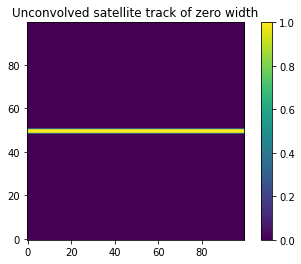

In [13]:
plt.imshow(track, origin='lower')
plt.title('Unconvolved satellite track of zero width')
plt.colorbar()
plt.show()

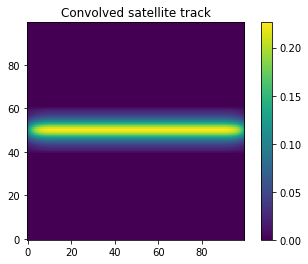

In [14]:
track_conv = scipy_convolve(track, PSF, mode='same', method='direct')

plt.imshow(track_conv, origin='lower')
plt.title('Convolved satellite track')
plt.colorbar()
plt.show()